<b><font color="red" size="6">ch12. 데이터 프레임과 시리즈(Pandas)</font></b>

# 9절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 Group by
cf. pivot_table

In [2]:
# 1) 그룹화 방법1
#    df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris_grouped = iris.groupby(iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [3]:
iris_grouped_sum.loc[['setosa','virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [4]:
print(iris_grouped_sum.columns)
print(iris_grouped_sum.index)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


In [5]:
iris_grouped_sum.reset_index(inplace=True) # index를 컬럼 데이터로 편입

In [6]:
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [7]:
# iris_grouped_sum에서 setosa 그룹함수 결과만 추출
iris_grouped_sum[iris_grouped_sum['Species']=='setosa']
iris_grouped_sum[iris_grouped_sum.Species=='setosa']
iris_grouped_sum.loc[iris_grouped_sum.Species=='setosa']

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3


In [8]:
# iris_grouped_sum에서 setosa와 virginica 그룹함수 결과만 추출
iris_grouped_sum[ (iris_grouped_sum.Species=='setosa') |
                  (iris_grouped_sum.Species=='virginica')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [9]:
iris_grouped_sum[iris_grouped_sum.Species.isin(['setosa', 'virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [10]:
# 1) 그룹화 방법1.1 : 그룹핑할 때 index를 컬럼 데이터로 편입(reset_index 가 필요 X)
#    df.groupby(by=[그룹핑할열], as_index=False)[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris.groupby(iris.Species, as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [11]:
display(iris.groupby(iris.Species).sum())
display(iris.groupby(['Species']).sum())
display(iris.groupby('Species').sum())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [12]:
# 종별 Sepal.Length와 Sepal.Width의 평균
iris.groupby('Species').mean()[['Sepal.Length','Sepal.Width']]
iris.groupby('Species')[['Sepal.Length','Sepal.Width']].mean()

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [13]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')['Sepal.Length'].sum() # 결과가 시리즈(1차원)

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [14]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')[['Sepal.Length']].sum() # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [15]:
# 1) 그룹화 방법1
#   df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
# 2) 그룹화 방법2
#   df.pivot_table(index='그룹화할 필드들',
#                  values=['함수적용해서출력할열들'],
#                  aggfunc='함수명(기본값:mean)')
iris.pivot_table(index='Species') # 종별 평균들

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [16]:
#iris.groupby('Species')[['Sepal.Length','Sepal.Width']].sum()
iris.pivot_table(index='Species',
                values=['Sepal.Length','Sepal.Width'],
                aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [17]:
iris.groupby('Species').count() # 결측치를 제외한 데이터 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [18]:
iris.pivot_table(index='Species',
                aggfunc='count')# 결측치를 제외한 데이터 갯수

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [19]:
import random
random.sample(range(len(iris)), 3)

[1, 135, 140]

In [20]:
iris.shape[1]-1 # iris의 독립변수 열 갯수

4

In [21]:
# 각열에 임의의 행에 결측치를 할당
# (0번째열은 결측치1개, 1번째열은 결측치2개, 2번째열은 결측치 3개, 3번째열은 결측치4)
for col in range(iris.shape[1]-1 ):
    iris.iloc[random.sample(range(len(iris)), col+1), col] = np.nan

In [22]:
iris.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,48,49
versicolor,50,49,50,49
virginica,50,50,49,48


In [23]:
result = iris.pivot_table(index='Species',
                aggfunc='count')
result = result[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,48,49
versicolor,50,49,50,49
virginica,50,50,49,48


In [24]:
iris['Species'].value_counts() # 종별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 다중열로 그룹화

In [25]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [26]:
# iris로 다중열 그룹화하기 위해서 데이터 추가(num 필드)
# iris의 행수가 150개 = Species 3그룹 , num 6그룹
[[i]*25 for i in range(6)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]

In [27]:
import numpy as np
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [28]:
# 종별, num별 합계
r = iris.groupby(by=['Species','num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           120.9         87.0          33.6          6.0
           1           124.6         81.2          36.6          6.1
versicolor 2           150.3         66.1         107.8         32.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         135.3         51.1
           5           165.0         75.5         136.6         46.3

In [29]:
r.index

MultiIndex([(    'setosa', 0),
            (    'setosa', 1),
            ('versicolor', 2),
            ('versicolor', 3),
            ( 'virginica', 4),
            ( 'virginica', 5)],
           names=['Species', 'num'])

In [30]:
r.loc[['setosa','virginica']] # setosa와 virginica만 결과 추출

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           120.9         87.0          33.6          6.0
          1           124.6         81.2          36.6          6.1
virginica 4           164.4         73.2         135.3         51.1
          5           165.0         75.5         136.6         46.3

In [31]:
# 종별, num별 중위수 ('Species','num'이 컬럼 데이터로 편입)
r = iris.groupby(by=['Species','num'], as_index=False).median()
r

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.05,3.4,1.50,0.2
1,setosa,1,5.00,3.4,1.50,0.2
2,versicolor,2,6.10,2.8,4.50,1.4
3,versicolor,3,5.70,2.8,4.20,1.3
4,virginica,4,6.50,2.9,5.55,2.0
5,virginica,5,6.40,3.0,5.50,2.0


In [32]:
# setosa와 virginica 추출
r[ (r['Species']=='setosa') | (r['Species']=='virginica')]
r[ r['Species'].isin(['setosa','virginica'])]

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.05,3.4,1.50,0.2
1,setosa,1,5.00,3.4,1.50,0.2
4,virginica,4,6.50,2.9,5.55,2.0
5,virginica,5,6.40,3.0,5.50,2.0


In [33]:
# iris.groupby(by=['Species','num']).sum() 와 동일
iris.pivot_table(index=['Species','num'],
                # values=[],
                aggfunc='sum')

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species    num                                                      
setosa     0            33.6          6.0         120.9         87.0
           1            36.6          6.1         124.6         81.2
versicolor 2           107.8         32.6         150.3         66.1
           3           105.2         32.7         146.5         69.1
virginica  4           135.3         51.1         164.4         73.2
           5           136.6         46.3         165.0         75.5

In [34]:
# 종별 기초 통계량(min, max, count, mean, median, Q1, Q3, std...) 모두
iris.groupby(['Species']).describe()

Sepal.Length                                                 \
                  count      mean       std  min    25%  50%  75%  max   
Species                                                                  
setosa             49.0  5.010204  0.354874  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width            ... Petal.Width        num                 \
                 count      mean  ...         75%  max count mean       std   
Species                           ...                                         
setosa            49.0  3.432653  ...         0.3  0.6  50.0  0.5  0.505076   
versicolor        49.0  2.759184  ...         1.5  1.8  50.0  2.5  0.505076   
virginica         50.0  2.974000  ...         2.3  2.5  50.0  4.5  0.505076   

                                     
            min  25%  50%  75%  max  
Species                              
setosa      0.0  0.0  0.5  1.0  1.0  
versicolor  2.0  2.0  2.5  3.0  3.0  
virginica   4.0  4.0  4.5  5.0  5.0  

[3 rows x 40 columns]

In [35]:
iris.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  49.000000   50.000000  50.000000
             mean    5.010204    5.936000   6.588000
             std     0.354874    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  49.000000   49.000000  50.000000
             mean    3.432653    2.759184   2.974000
             std     0.381547    0.307489   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.500000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.700000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  48.000000   50.000000  49.000000
             mean    1.462500    4.260000   5.548980
             std     0.174582    0.469911   0.557196
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.500000
             75%     1.525000    4.600000   5.900000
             max     1.900000    5.100000   6.900000
Petal.Width  count  49.000000   49.000000  48.000000
             mean    0.246939    1.332653   2.029167
             std     0.106266    0.194066   0.270506
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
num          count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

In [36]:
g = iris.groupby(['Species'])[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.010204,3.432653,1.46250,0.246939
versicolor,5.936000,2.759184,4.26000,1.332653
virginica,6.588000,2.974000,5.54898,2.029167


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

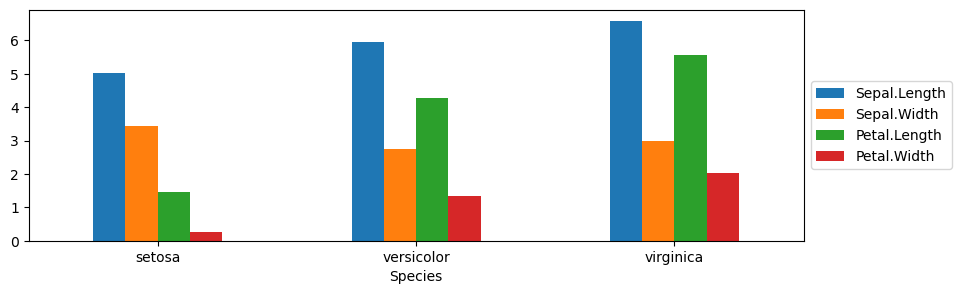

In [37]:
import matplotlib.pyplot as plt
g.plot(kind='bar', figsize=(10,3), rot=0)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.show()

In [38]:
# 종별, num별 평균
g = iris.groupby(['Species', 'num']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0          5.0375     3.480000       1.46087     0.250000
           1          4.9840     3.383333       1.46400     0.244000
versicolor 2          6.0120     2.754167       4.31200     1.358333
           3          5.8600     2.764000       4.20800     1.308000
virginica  4          6.5760     2.928000       5.63750     2.044000
           5          6.6000     3.020000       5.46400     2.013043

In [39]:
# g의 level0 인덱스만 그대로 두고, level1 인덱스를 컬럼값으로 올려
g.unstack().T

Species             setosa  versicolor  virginica
             num                                 
Sepal.Length 0    5.037500         NaN        NaN
             1    4.984000         NaN        NaN
             2         NaN    6.012000        NaN
             3         NaN    5.860000        NaN
             4         NaN         NaN   6.576000
             5         NaN         NaN   6.600000
Sepal.Width  0    3.480000         NaN        NaN
             1    3.383333         NaN        NaN
             2         NaN    2.754167        NaN
             3         NaN    2.764000        NaN
             4         NaN         NaN   2.928000
             5         NaN         NaN   3.020000
Petal.Length 0    1.460870         NaN        NaN
             1    1.464000         NaN        NaN
             2         NaN    4.312000        NaN
             3         NaN    4.208000        NaN
             4         NaN         NaN   5.637500
             5         NaN         NaN   5.464000
Petal.Width  0    0.250000         NaN        NaN
             1    0.244000         NaN        NaN
             2         NaN    1.358333        NaN
             3         NaN    1.308000        NaN
             4         NaN         NaN   2.044000
             5         NaN         NaN   2.013043

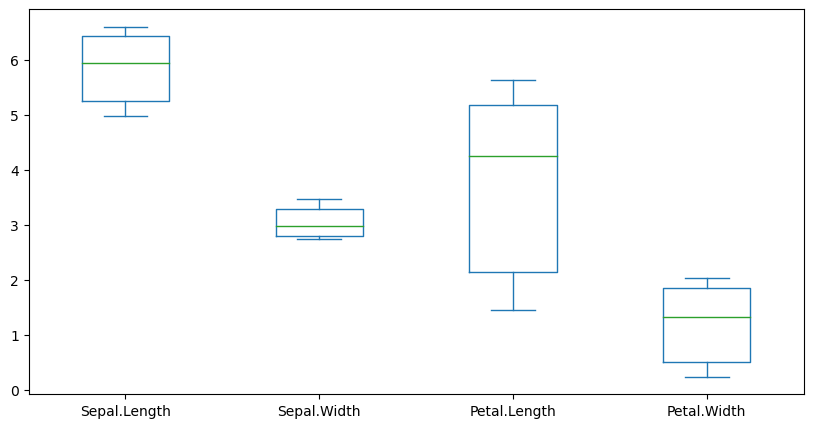

In [40]:
g.plot(kind = 'box', figsize=(10,5))
plt.show()

## 9.2 그룹간 데이터 처리

In [41]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [42]:
for speciename, group in iris_grouped:
    print(speciename)
    display(group.head(3))

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


In [43]:
iris.sample(5).sort_index()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
41,4.5,2.3,1.3,0.3,setosa,1
44,5.1,3.8,1.9,0.4,setosa,1
56,6.3,NaN,4.7,1.6,versicolor,2
101,5.8,2.7,5.1,1.9,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5


In [44]:
# 종별 임의의 표본 5개씩 출력
for idx, (speciename, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciename))
    display(group.sample(5).sort_index())

0번째 그룹은 setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
23,5.1,3.3,1.7,0.5,setosa,0
26,5.0,3.4,1.6,0.4,setosa,1
33,5.5,4.2,1.4,0.2,setosa,1
36,5.5,3.5,1.3,0.2,setosa,1
46,5.1,3.8,1.6,0.2,setosa,1


1번째 그룹은 versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
64,5.6,2.9,3.6,1.3,versicolor,2
65,6.7,3.1,4.4,1.4,versicolor,2
79,5.7,2.6,3.5,1.0,versicolor,3
94,5.6,2.7,4.2,1.3,versicolor,3


2번째 그룹은 virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
107,7.3,2.9,6.3,1.8,virginica,4
112,6.8,3.0,5.5,2.1,virginica,4
124,6.7,3.3,NaN,2.1,virginica,4
126,6.2,2.8,4.8,1.8,virginica,5
144,6.7,3.3,5.7,2.5,virginica,5


In [45]:
# 종별 0,10,20,30,40 번째 데이터 출력 : s - 0,10,20,30,40 vs - 50,60,70,80,90 vn - 100,110,120,130,140
for speeciesname, data in iris.groupby('Species'):
    print(speeciesname, '그룹')
    display(data.iloc[::10]) 

setosa 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터 프레임 그룹 인덱싱

In [46]:
t = iris.groupby('Species').take([0,10,20,30,40])
display(t)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

In [47]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,1
40,5.0,3.5,1.3,0.3,1


## 9.4 레이블(원핫인코딩)

In [48]:
iris.drop('num', axis=1, inplace=True)

In [49]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체
iris['target'] = le.fit_transform(iris.Species)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
125,7.2,3.2,6.0,1.8,virginica,2


# 10절. 데이터 구조 변경
## 10.1 와이드포맷 <-> 롱포맷
[Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 7page<br>
        [판다스 공식 문서에 나오는 melt](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt)

In [51]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.2 melt를 이용한 언 피벗팅(와이드포맷 -> 롱포맷)

In [52]:
airquality_melted=airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [53]:
airquality_melted = airquality.melt(id_vars=['Month','Day'], 
                var_name='var', # melt된 열의 이름
                value_name='값' # 데이터가 된 열의 이름
               )
airquality_melted.sort_values(by=['Month','Day'], inplace=True)
airquality_melted.reset_index(inplace=True, drop=True)
airquality_melted

,Month,Day,var,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


### melt연습하기 예제

In [54]:
%ls D:\KHH\ai\Download\shareData

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2B13-161D

 D:\KHH\ai\Download\shareData 디렉터리

2024-11-25  오후 12:39    <DIR>          .
2024-11-25  오후 12:39    <DIR>          ..
2024-11-18  오후 04:13    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:57           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  468,369,571,840 바이트 남음


In [55]:
df_first = pd.read_csv('D:/KHH/ai/Download/shareData/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_last = pd.read_csv('D:/KHH/ai/Download/shareData/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv', encoding='cp949')
df_first.shape, df_last.shape

((17, 22), (9010, 5))

In [56]:
df_first.head(1) # => new_first(지역명, 연도, 월, 분양가격(제곱미터))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [57]:
df_last.head(1) # new_last(모든면적 행만 지역명, 연도, 월, 분양가격(제곱미터))

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [58]:
# 지역 연도월 평당분양가격 식의 롱포맷 데이터로 바꾸기
new_first = df_first.melt(id_vars=['지역'], var_name='연도월', value_name='평당분양가격')
new_first.sample(1)

,지역,연도월,평당분양가격
278,울산,2015년4월,9380


In [59]:
# 연도월 컬럼을 연도, 월로 분리 "2013년" => 2013, 12
# new_first['연도월'].map(lambda x:int(x.split('년')[0])) # 1차원만 가능
new_first['연도'] = new_first['연도월'].apply(lambda x:int(x.split('년')[0])) # 1, 2차원 모두 가능

In [60]:
new_first['월'] = new_first['연도월'].map(lambda x : int(x.split('년')[-1].replace('월','')))
new_first

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [61]:
# 평당분양가격/3.3 => 분양가격(제곱미터)
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [62]:
new_first['분양가격(제곱미터)'] = new_first['평당분양가격']/3.3
new_first.sample(1)

,지역,연도월,평당분양가격,연도,월,분양가격(제곱미터)
122,인천,2014년7월,9974,2014,7,3022.424242


In [63]:
new_first.drop(['연도월','평당분양가격'],inplace=True, axis=1)
new_first

,지역,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788
...,...,...,...,...
352,전북,2015,8,1993.939394
353,전남,2015,8,1905.757576
354,경북,2015,8,2132.424242
355,경남,2015,8,2322.727273


In [64]:
new_first.columns = ['지역명','연도','월','분양가격(제곱미터)']
new_first

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788
...,...,...,...,...
352,전북,2015,8,1993.939394
353,전남,2015,8,1905.757576
354,경북,2015,8,2132.424242
355,경남,2015,8,2322.727273


In [65]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.1+ KB


In [66]:
new_last = df_last[df_last['규모구분'] == '모든면적']
new_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [67]:
new_last.drop(['규모구분'],inplace=True, axis=1)
new_last.head(1)

C:\Users\4545\AppData\Local\Temp\ipykernel_12344\336532525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_last.drop(['규모구분'],inplace=True, axis=1)


,지역명,연도,월,분양가격(제곱미터)
0,서울,2015,10,5841


In [68]:
new_first.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182


In [69]:
df = pd.concat([new_first, new_last])
df.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


## 10.3 pivot_table 을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [70]:
airquality_melted=airquality.melt(id_vars=['Month','Day'])
airquality_melted.sort_values(['Month','Day'], inplace=True)
airquality_melted.reset_index(drop=True, inplace=True)
airquality_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


In [71]:
airquality2 = airquality_melted.pivot_table(index=['Month', 'Day'], columns=['variable'], values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [72]:
airquality2.reset_index(level=['Month','Day'], col_level=1,inplace=True)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [73]:
airquality2.columns = airquality2.columns.droplevel(level=0) # 0번 level의 컬럼 제거
airquality2.head(1)

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


In [74]:
airquality2.columns.name = ''
airquality2.head(1)

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


### pivot_table(), pivot() 함수의 차이

In [75]:
import numpy as np
year = [2020]*3+[2021]*3
month = [1,2,3]*2
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, month, latte, americano, mocha],
                     columns=['year', 'month', 'latte', 'americano', 'mocha'])
sales

,year,month,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [76]:
sales.groupby(['year'])[['latte','americano','mocha']].sum()

,latte,americano,mocha
year,,,
2020,1213,1467,949
2021,1209,1444,903


In [77]:
result = sales.pivot_table(index='year',
                          values=['latte','americano','mocha'],
                          aggfunc='sum')
result

,americano,latte,mocha
year,,,
2020,1467,1213,949
2021,1444,1209,903


In [78]:
result.loc[2021]

americano    1444
latte        1209
mocha         903
Name: 2021, dtype: int32

In [79]:
# pivot()
sales = sales.iloc[:,:-2]
sales

,year,month,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [80]:
sales.pivot(index='year', columns='month')

latte          
month     1    2    3
year                 
2020    410  401  402
2021    400  404  405

# 11절. 데이터프레임에 함수 적용시키기
- apply(func, axis(2차원만)) : (1차원 시리즈, 2차원 데이터프레임 모두 적용가능)
- applymap(func) : 각 요소별로 적용(2차원 데이터프레임에서만 가능)
- map(func) : 각 요소별로 적용(1차원 시리즈에서만 가능)

## 11.1 apply

In [81]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv',comment='#')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    5 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [82]:
member[member['Birth'].apply(lambda x: int(x.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [83]:
# ex2. 2차원 데이터프레임에 apply 적용(axis = 0 기본)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [84]:
df_last['연도월'] = df_last.apply(lambda x: str(x['연도'])+'년'+str(x['월'])+'월', axis=1)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60제곱미터이하,2015,10,5652,2015년10월
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,2015년10월
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,2015년10월
4,서울,전용면적 102제곱미터초과,2015,10,5879,2015년10월


In [85]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
X = iris.iloc[:,:-1]
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [87]:
X.apply(np.sum, axis=0)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [88]:
X.apply(np.sum, axis=1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [89]:
# X의 열평균
avg = X.apply(np.average, axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [90]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
X.apply(lambda x: round(x-avg,2), axis=1) # 행별 평균과의 거리를 소수점 2자리까지 출력

,sepal_length,sepal_width,petal_length,petal_width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


In [92]:
X.apply(lambda x: list(round(x-avg,2)), axis=1)

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

## 11.2 applymap

In [93]:
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [94]:
X.applymap(lambda x: x**2)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 11.3 map

In [95]:
member = pd.read_csv('data/ch12_member.csv',comment='#')
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [96]:
member[member['Birth'].map(lambda x: int(x.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


# 12절. 일괄 변경하기(결측치나 특정값)
## 12.1 fillna (결측치를 어떤 값으로 치환)
- 대부분 결측치는 drop하거나, 평균값대체, 최빈값대체, 중위수대체, 그룹별 평균값, 이전값으로 대체, 다음값으로 대체, 
회귀식결과값으로 대체함

In [97]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, 3, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [98]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [99]:
# 결축치를 이전행의 값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [100]:
# 결축치를 다음행의 값으로 대체
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [101]:
# 결측치를 특정 대체값으로 바꿈
values = {'A':99,'B':98,'C':97,'D':96}
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [102]:
# 결측치를 열별 평균으로 바꿈
df.fillna(value=df.mean(axis=0))

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [103]:
df.fillna(value=values, limit=3) # 결측치 대체는 3번째 행까지만

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 12.2 replace(to_value, new_value, inplace = T/F)
- to_value를 new_value로 변경
- 정규표현식을 이용 가능

In [104]:
s = pd.Series([0,1,2,3,None])
s.replace(np.nan, 0, inplace=True)
s.replace([0,1], 99) # 0이나 1을 99로 변경

0    99.0
1    99.0
2     2.0
3     3.0
4    99.0
dtype: float64

In [105]:
s = pd.Series([0,1,2,3,None])
s.replace([0,1,2], [100,101,102])

0    100.0
1    101.0
2    102.0
3      3.0
4      NaN
dtype: float64

In [106]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})

In [107]:
df.replace(r'^ba.+$','XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXX,xyz


In [108]:
df.replace({'A':'bat','B':'XXX'})

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


## 12.3 where(조건), mask(조건)
    - where(조건) : 조건이 만족하는 요소는 그대로 출력하고 만족하지 않는 요소는 결측치로
    - mask(조건) : where의 반대

In [109]:
s = pd.Series(range(10,20))
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [110]:
s[s>15] # 조건이 만족되는 데이터 출력

6    16
7    17
8    18
9    19
dtype: int64

In [111]:
s.where(s>15) # 조건이 만족되는 데이터는 그대로 출력. 만족되지 않은 데이터는 결측치

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [112]:
s.mask(s>15) # 조건이 만족되는 데이터를 NaN으로

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
- 결측치가 있는 데이터 누락(행기준, 열기준)

In [113]:
df = pd.DataFrame({'name':['홍','김','이',np.nan],
                   'age' :[np.nan,20,30,np.nan],
                   'born':['서울','부산',np.nan,np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [114]:
df.dropna()

,name,age,born
1,김,20.0,부산


In [115]:
df.dropna(subset=['name','age']) # name, age 열에 결측치가 하나라도 있는 행 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [116]:
df.dropna(how='all') # 모두 결측치인 행만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN


In [117]:
df.dropna(axis=1) # 결측치가 하나라도 있는 열을 모두 삭제

""
0
1
2
3


In [118]:
df.dropna(axis=1, how='all') # 모두 결측치인 열만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [119]:
import seaborn as sns
import random
print(random.sample(range(150),20))
iris = datasets.get_rdataset('iris').data

[37, 148, 115, 65, 89, 126, 140, 81, 1, 29, 85, 31, 45, 146, 105, 24, 83, 111, 60, 139]


In [120]:
# iris 가져와 랜덤하게 열마다 20개씩 결측치 할당
for col in range(iris.shape[1]-1 ):
    iris.iloc[random.sample(range(150),20), col] = np.nan
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  130 non-null    float64
 1   Sepal.Width   130 non-null    float64
 2   Petal.Length  130 non-null    float64
 3   Petal.Width   130 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [121]:
# 2단계 : 결측치가 있는 iris데이터를 출력한다 return 함수 isna(), isnull()
iris[(iris['Sepal.Length'].isna())|(iris['Sepal.Width'].isna())|
     (iris['Petal.Length'].isna())|(iris['Petal.Width'].isna())]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.7,NaN,1.3,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
6,4.6,3.4,1.4,NaN,setosa
8,4.4,2.9,NaN,0.2,setosa
9,4.9,3.1,NaN,0.1,setosa
...,...,...,...,...,...
136,6.3,3.4,5.6,NaN,virginica
138,6.0,NaN,4.8,1.8,virginica
140,6.7,3.1,NaN,NaN,virginica
144,NaN,3.3,5.7,2.5,virginica


In [122]:
# 3단계 : 결측치를 열평균으로 대체된 iris데이터를 출력한다(inplace=True)
iris.fillna(value = iris.iloc[:,:-1].mean(axis=0), inplace=True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [123]:
# iris 데이터를 소수점 3자리 반올림하기
iris.iloc[:,:-1] = iris.iloc[:,:-1].applymap(lambda x : np.round(x,3))
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.500,1.4,0.2,setosa
1,4.9,3.000,1.4,0.2,setosa
2,4.7,3.056,1.3,0.2,setosa
3,4.6,3.100,1.5,0.2,setosa
4,5.0,3.056,1.4,0.2,setosa


# 13절. 시리즈
- 1차원 데이터

In [124]:
s = pd.Series([1000,7000,5000,2000,1500],
              index=['apple','mango','banana','cherry','orange'])
s

apple     1000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [125]:
s['apple'], s.apple

(1000, 1000)

In [126]:
s['apple':'banana'] # 슬라이싱(mango포함)

apple     1000
mango     7000
banana    5000
dtype: int64

In [127]:
s[['apple','banana']] # mango 미포함

apple     1000
banana    5000
dtype: int64

In [128]:
s['watermelon'] = 20000 # 시리즈에 데이터 추가
s['apple'] = 3000
s

apple          3000
mango          7000
banana         5000
cherry         2000
orange         1500
watermelon    20000
dtype: int64

In [129]:
s.drop('watermelon', inplace=True) # 시리즈 데이터 삭제
s

apple     3000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [130]:
s.sort_index(inplace=True) # index로 정렬
s

apple     3000
banana    5000
cherry    2000
mango     7000
orange    1500
dtype: int64

In [131]:
s.sort_values() # 값에 의한 정렬 (기본 : ascending=True - 오름차순 정렬)

orange    1500
cherry    2000
apple     3000
banana    5000
mango     7000
dtype: int64

In [132]:
s.sort_values(ascending=False, inplace=True)

In [133]:
s.to_frame()

,0
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [134]:
s.to_frame(name='price') # 열이름을 지정하여 데이터 프레임으로 전환

,price
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [135]:
s.to_frame(name='price').T

,mango,banana,apple,cherry,orange
price,7000,5000,3000,2000,1500


# 연습문제

In [136]:
# iris 데이터에서 처음 다섯개 행만 출력하세요
import seaborn as sns
iris = datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [153]:
#iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. 종속변수는species 열입니다.
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1:]
X, y

(     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
        Species
 0       setosa
 1       setosa
 2       setosa
 3       setosa
 4       setosa
 ..         ...
 145  virginica
 146  virginica
 147  virginica
 148  virginica
 149  virginica
 
 [150 rows x 1 columns])

In [138]:
# iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
temp = iris.head(50)
display(temp)
temp = iris.iloc[:50]
temp

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [158]:
# 3번에서 선택한 데이터프레임의 요약정보를 출력하세요. 모든 열에 대해 요약정보가출력되어야 합니다
display(temp.describe(include='all'))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [140]:
# versicolor종의 데이터만 iris_versicolor변수에 저장하세요
iris_versicolor = iris[iris['Species'] == 'versicolor'].iloc[:,:-1]
iris_versicolor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [141]:
# 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요
iris_df = pd.concat([X,y], axis=1)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [142]:
# iris 데이터의 각 열 평균값을 출력하세요
iris.iloc[:,:-1].mean(axis=0)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [143]:
# iris 데이터의 각 열들 사이의 상관계수를 출력하세요
iris.iloc[:,:-1].corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [144]:
# iris데이터에서 각 요소들과 변수별 평균과의 차이를 출력하세요
iris.apply(lambda x : x - iris.iloc[:,:-1].mean(axis=0), axis=1).iloc[:,:-1].head()

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
0,-2.358,-0.999333,-0.743333,0.442667
1,-2.358,-0.999333,-0.943333,-0.057333
2,-2.458,-0.999333,-1.143333,0.142667
3,-2.258,-0.999333,-1.243333,0.042667
4,-2.358,-0.999333,-0.843333,0.542667


In [145]:
# iris데이터의 종별 평균을 출력하세요
avg = iris.groupby(iris['Species']).mean()
avg

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [169]:
# iris 데이터에서 각 요소들과 종별 변수의 평균과의 차이를 출력하세요 각 종별로 3개씩 출력하세요
result = iris.apply(lambda x : x - avg.loc[x.Species], axis = 1)

In [170]:
result.iloc[list(range(3))+list(range(50,53))+list(range(100,103))]

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [171]:
r = result.groupby(iris.Species).take(range(3))
# r.droplevel(level=0) # axis=0기본값
r.index = r.index.droplevel(level=0)
r

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [172]:
r.index = [0, 1, 2, 50, 51, 52, 100, 101, 102]
r

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN
